<a href="https://colab.research.google.com/github/FilLTP89/teaching/blob/master/MIFO_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Uncertainty modelling, quantification and non-parametric meta-modelling**

This notebook is intended to show some interesting applications of major ***uncertainty quantification*** and ***non-parametric meta-modelling*** in the field of Civil Engineering. 

In this context, ***Machine Learning (ML)*** gained huge momentum in the last few years.

ML was born from pioneering works in ***Artificial Intelligence, AI***. At its most basic, NL is the practice of using algorithms to ***parse data, learn from it, and then make a determination or prediction about something*** in the world.

But what is the difference between Artificial Intelligence, Machine Learning, and Deep Learning? 

Think of them as concentric circles, one including another.




In [0]:
from IPython.display import Image

In [107]:
Image(url= "https://blogs.nvidia.com/wp-content/uploads/2016/07/Deep_Learning_Icons_R5_PNG.jpg.png", width=1000)


1. The dream of those AI pioneers was to construct complex machines that possessed the same characteristics of human intelligence. This is the concept we think of as ***General AI*** - fabulous machines that have all our senses (maybe even more), all our reason, and think just like we do. 


***C-3PO, an iconic example of General AI***

In [108]:

Image(url="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fpt%2F6%2F66%2FC-3PO.jpg&f=1&nofb=1",width=200)

2. ***Narrow AI***: Technologies that are able to perform specific tasks as well as, or better than, we humans can. Examples of narrow AI are things such as image classification on a service like Pinterest and face recognition on Facebook.

3. ***Machine Learning*** is intended to *train* the machine using large amounts of data and algorithms that give it the ability to learn how to perform the task, rather than hand-coding software routines with a specific set of instructions to accomplish a particular task (as in General AI)

4. *** Deep Learning*** is a way to train the machine by *trial&error* approach, on a huge amount of data. Image recognition was the dragging field that led Deep Learning prevail.

The interest and the applications of Deep Learning approach exploded after 2012, due :
 1. to the large amount of *labelled* ***open-source data*** in different fields of science, economy, society ; 
 2. to the increasing computational power available (in particular, exploiting ***Graphic Process Units, GPU***, widely used in computer vision applications) granting fast access to large databases.


The latter issues shifted the paradigm that traditionally informed ML, steering the path of the so called ***Deep Learning*** approach (DL).

Check [this article](https://blogs.nvidia.com/blog/2016/07/29/whats-difference-artificial-intelligence-machine-learning-deep-learning-ai/) for further reading on this topic.

-----



`python3` offers a wide range of packages to perform ML and DL tasks:
+ [`numpy`](https://numpy.org/)
+ [`pandas`, Python Data Analysis Library](https://pandas.pydata.org/)
+ [`scikit-learn`, Machine Learning in Python](https://scikit-learn.org/stable/index.html)

In  the followig, we are going to exploit those tools to solve create non-parametric models to predict some quantities of interest. Let's upload those packages:

In [0]:
import numpy as np
import pandas as pd
import sklearn as skl

import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib inline

Before getting started, a few general hints:

1. `lambda` constructors: they are used in `python` to define anonymous functions ([see this link](https://realpython.com/python-lambda/))




In [110]:
arr = np.array([1.5, 2.8, 3.1])
scale = lambda x: x * 3 
scale(arr)

array([4.5, 8.4, 9.3])

2. Handle `pandas` dataframe

In [111]:
Image(url="https://www.tutorialspoint.com/python_pandas/images/structure_table.jpg",width=1000)

In [113]:
# Empty dataframe
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [114]:
# Basic database
data = [1,2,3,4,5]
df = pd.DataFrame(data)
print(df)

   0
0  1
1  2
2  3
3  4
4  5


In [115]:
# Database with column labels
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'])
print(df)

     Name  Age
0    Alex   10
1     Bob   12
2  Clarke   13


In [116]:
# Repartitioning data into dataframe
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'],dtype=float)
print(df)

     Name   Age
0    Alex  10.0
1     Bob  12.0
2  Clarke  13.0


In [117]:
# Deal with indices
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data, index=['rank1','rank2','rank3','rank4'])
print(df)

        Name  Age
rank1    Tom   28
rank2   Jack   34
rank3  Steve   29
rank4  Ricky   42


3. plot data: ([see this link](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py))



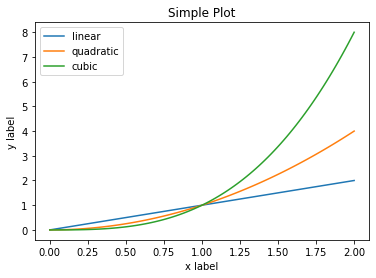

In [118]:
x = np.linspace(0, 2, 100)
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()
plt.show()

4. Design ***Neural Network*** with `sklearn`:

X [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
y [0 1 2 ... 8 9 8]
X [[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]
Training set score: 0.978854
Training set loss: 0.009886
MSE on test set: 0.9554937413073713


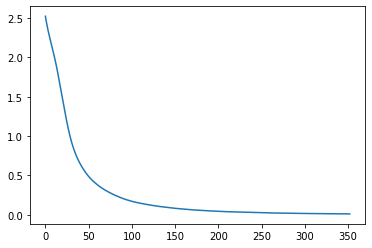

In [119]:
'''Model of fitting function for MLP classifier'''

"""
        Fit the model to the data
        
        Args:
            X (np.ndarray): features
            y (np.array): target labels
            
        Returns:
            obj: the MLPClassifierWrapper object
"""
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Prepare dataset
iris = datasets.load_iris()
X, y = datasets.load_digits(return_X_y=True)
print('X {}'.format(X))
print('y {}'.format(y))
X = StandardScaler().fit_transform(X)
print('X {}'.format(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)


number_of_layers=2
hidden_layer_size= (10,10) # number of neurons per layer - must be tuple
activation = 'relu' # activation function
alpha = 0.00000001 # learning rate
max_iter = 1000 # maximum number of epochs of training
model=MLPClassifier(activation=activation,hidden_layer_sizes=hidden_layer_size,
                    alpha=alpha,random_state=0,max_iter=max_iter)
model.fit(X_train,y_train)
print("Training set score: %f" % model.score(X, y))
print("Training set loss: %f" % model.loss_)
plt.plot(model.loss_curve_)


# Predict test dataset
y_pred = model.predict(X_test)
print('MSE on test set: {}'.format((np.abs(y_pred-y_test)**2).mean()))


----

## Task 1: Non-linear regressions

The aim of this task is to get acquainted with non-linear polynomial regressions. In this task, the following *kindergarten* equation is considered:

$$f(x) = \sin(30(x-0.9)^4)\cos(2(x-0.9))+\frac{x-0.9}{2}$$

Given the equation above, solve the following issues:

1.  Plot $f(x)$ and evaluate it at 100 random points $x_i\in\left[0,1\right]$ (hint: check [`numpy` random sampling](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html)).
2. Using [`numpy.polyfit`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) or [`sklearn fit/predict` tool](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html), fit the selected points for different polynomial orders (hint: 3,4,5,... or piece-wise polynomials). Show the fitting improvements obtained when changing the polynomial order.
3. How the fit improves when considering 10, 100, 1000 random points?
4.  Design a meta-model based on ***Multi-Layer perceptron (MLP)*** to fit the curve sampled with 10, 100, 1000 points respectively. Use the least number of layers and neurons possible (hint: use the [`sklearn.neural_network.MLPRegressor`](http://www.machinelearningtutorial.net/2017/01/28/python-scikit-simple-function-approximation/).

## Task 2: Non-parametric meta-modelling

Consider now a training set of samples $(x_i,y_i)$, listed in the table given in the file `dataset_training.csv`. This set of points represents real measurements of an unknown physical phenomenon. Measurements are inevitably polluted by observational errors.
The aim of this task is to construct a non-parametric meta-model based on Artificial Neural Network.
Given the training dataset, solve the following issues: 

1. Plot the *training* dataset and use polynomial regression to fit the data and find a *trend* (hint: use [`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) and [`pandas.DataFrame.plot`](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html))
2. Design a 1-layer MLP, and train it on the training data-set. Compare the prediction on the training set, obtained with 1, 2 and 10 neurons. 
3. Analyze the MLP performances after training . Does the MLP *overfit* the data?
4. Test the MLP performance on the *test* dataset, reported in the file `dataset_testing.csv`.

In [120]:
Image(url="https://scikit-learn.org/stable/_images/sphx_glr_plot_underfitting_overfitting_001.png",width=1000)

In [123]:
dataset_training_link='https://raw.githubusercontent.com/FilLTP89/teaching/master/datasets/dataset_training.csv'

dataset_testing_link='https://raw.githubusercontent.com/FilLTP89/teaching/master/datasets/dataset_testing.csv'

# df = pd.read_csv(...)

          X             Y
0     1.000 -4.786381e+04
1     1.018  1.009941e+05
2     1.036  2.568633e+05
3     1.054  1.400795e+05
4     1.072  2.906649e+05
..      ...           ...
496   9.928  1.002344e+06
497   9.946  1.072772e+06
498   9.964  9.368332e+05
499   9.982  1.089995e+06
500  10.000  1.059656e+06

[501 rows x 2 columns]


## Task 3: Non-linear parametric meta-model - Real case example

Finally a real case of application of a non-linear parametric meta-model in earthquake engineering will be studied in this section. The main idea here is to propose a surrogate model$*$ used to replace a more expensive finite element model (FEM) of a masonry building.

* Surrogate Model: An analytical function or numerical model used to provide a rapid approximation of a more expensive model: e.g. analytical model, finite-element model, among others).

The masonry building analyzed in this work is illustrated in [Figure](https://github.com/FilLTP89/teaching/blob/master/imgs/masonry_building.png). The behavior of this structure is simulated on the basis of non-linear dynamic FE analysis, all details of the model are well described in Lopez-Caballero et al. 2011. Using the FEM model, the drifts (ED: matrix of $[1 \times 168]$) of the building were calculated using 168 different earthquakes, that have been characterized by 13 different proxies each(IM: matrix of $[13\times168]$). The databases are in file `mansonry_building_database.mat` [you can download here](https://github.com/FilLTP89/teaching/blob/master/datasets/mansonry_building_database.mat).



In [0]:
from scipy.io import loadmat
link_to_mat_file="/content/mansonry_building_database.mat"
database=loadmat(link_to_mat_file)


In [134]:
IM=database['IM']
ED=database['ED']
print(IM.shape)
print(ED.shape)

(13, 168)
(1, 168)


1. Plot each one of the input parameters (IM) with respect to the drift (ED). Visually analyze which proxy is more correlated to the output (hint: consider a log-log scale for your analysis).
2. Calculate the correlation matrix of the input (IM) and output (ED) variables for the 168 earthquakes of the complete database. A matrix of $[14\times14]$ (13 inputs+1 output) that describes the correlation between all parameters. Select 5 parameters based on the correlation matrix (hint: be careful with the redundant parameters. Use [`pandas.Dataframe.corr`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)).
3. Design a MLP (1-layer) using the 5 previously selected input parameters. Compare the prediction obtained with 1 up to 10 neurons. Information for the ANN: 80\% Training, 20\% Testing.
4. Calculate the squared correlation coefficient ($Q^{2}$) and the root mean square error ($RMSE$) for the each of the 10 MLP predictions.

$$ 
  Q^{2}(y_{i},y_i^{pred})=1-\dfrac{\sum_{n=1}^{N} (y_i^{pred}-y_{i})^{2}}{\sum_{n=1}^{N} 		  (y_{i}-\mu_{y})^{2}}
$$
$$
	RMSE(y_{i},y_i^{pred})=\sqrt{\sum_{n=1}^{N} \frac{(y_i^{pred}-y_{i})^{2}}{N}}
$$
5. Propose your final model (how many neurons) based on the squared correlation coefficient ($Q^{2}$) and the root mean square error ($RMSE$). Justify your answer. 
6. Plot your final ANN architecture (hint: Deploy solution window of the nftool $\rightarrow$ Graphics $\rightarrow$ Neural Network Diagram).
7. Plot the histogram of the 168 output real values (ED). Then create a synthetic input database, by creating a 10,000 random samples of each one of the 5 input parameters within their original range and used them to predict 10,000 outputs with your final MLP. Overlap the histogram of the synthetic database 10,000 predictions (new outputs). Compare the median and the standard deviation of the real and the synthetic database. 
8. Why do you think surrogate models are important and widely used for statistical engineering application purposes?

